# Overview of REBOUND

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What?" data-toc-modified-id="What?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What?</a></span></li><li><span><a href="#Installation" data-toc-modified-id="Installation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installation</a></span></li><li><span><a href="#Getting-started" data-toc-modified-id="Getting-started-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting started</a></span><ul class="toc-item"><li><span><a href="#Adding-bodies" data-toc-modified-id="Adding-bodies-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Adding bodies</a></span></li><li><span><a href="#Horizons-data" data-toc-modified-id="Horizons-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Horizons data</a></span></li><li><span><a href="#Units" data-toc-modified-id="Units-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Units</a></span></li><li><span><a href="#Integrators" data-toc-modified-id="Integrators-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Integrators</a></span></li></ul></li><li><span><a href="#Running-a-simulation" data-toc-modified-id="Running-a-simulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Running a simulation</a></span></li><li><span><a href="#Getting-the-results" data-toc-modified-id="Getting-the-results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Getting the results</a></span><ul class="toc-item"><li><span><a href="#Heartbeat-logging" data-toc-modified-id="Heartbeat-logging-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Heartbeat logging</a></span></li><li><span><a href="#Getting-particle-data-from-the-simulation" data-toc-modified-id="Getting-particle-data-from-the-simulation-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Getting particle data from the simulation</a></span></li><li><span><a href="#Capturing-a-timecourse" data-toc-modified-id="Capturing-a-timecourse-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Capturing a timecourse</a></span></li><li><span><a href="#Simulation-archive" data-toc-modified-id="Simulation-archive-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Simulation archive</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Animations-with-WebGL" data-toc-modified-id="Animations-with-WebGL-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Animations with WebGL</a></span></li></ul></li><li><span><a href="#Collisions-and-close-approaches" data-toc-modified-id="Collisions-and-close-approaches-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Collisions and close approaches</a></span></li></ul></div>

## What?

REBOUND is an N-body code for (optionally collisional) dynamics. It includes a choice of integrators, can be parallelized with OpenMP or MPI, and can use OpenGL or WebGL to display animated results.

The design philisophy seems to be hiding a lot of complexity behind a relatively simple interface with idiot-proof defaults. First impressions are that it's pretty successful at this.

Documentation: https://rebound.readthedocs.io/en/latest/index.html

Github: https://github.com/hannorein/rebound. This is well worth cloning to get the large set of example files. My notebooks borrow extensively from these.

Papers: There are five papers describing the functionality of REBOUND. 
- [Rein & Liu 2012](http://adsabs.harvard.edu/abs/2012A%26A...537A.128R) describe the code structure and the main feature including the gravity and collision routines for many particle systems.  
- [Rein & Spiegel 2015](http://adsabs.harvard.edu/abs/2015MNRAS.446.1424R) describe the versatile high order integrator IAS15 which is now part of REBOUND. 
- [Rein & Tamayo 2015](http://adsabs.harvard.edu/abs/2015MNRAS.452..376R) describe WHFast, the fast and unbiased implementation of a symplectic Wisdom-Holman integrator for long term gravitational simulations. 
- [Rein & Tamayo 2016](http://arxiv.org/abs/1603.03424) develop the framework for second order variational equations. 
- [Rein & Tamayo 2017](http://adsabs.harvard.edu/abs/2017MNRAS.467.2377R) describes the Simulation Archive for exact reproducibility of N-body simulations. 

## Installation

Start with a warning: <font color=red>___REBOUND does not work on Windows and likely never will___</font>.

On Linux or OS X the Python module can be installed from conda-forge or pip. It also works with C, if that's your taste.

In [1]:
import rebound

rebound.__version__

'3.8.2'

## Getting started

The broad priciple is to create a rebound.Simulation object and call methods on it.

### Adding bodies

There are various ways to add bodies (particles) to the sim, but for Solar System work it is simplest (though maybe not quickest) to use the [NASA Horizons server](https://ssd.jpl.nasa.gov/?horizons):

In [2]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Churyumov-Gerasimenko") # a comet

sim.status()

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Churyumov-Gerasimenko'... Found: 67P/Churyumov-Gerasimenko.
---------------------------------
REBOUND version:     	3.8.2
REBOUND built on:    	May 18 2019 03:15:47
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.002244745380898305 y=0.0076171192157178285 z=-1.883203645024814e-05 vx=-0.0004889253176977438 vy=2.3228748718022667e-06 vz=1.2723760152710309e-05>
<rebound.Particle object, m=0.0009547919152112404 x=-0.8443891294056753 y=-5.2173712312087535 z=0.04052632534397419 vx=0.42772696287045353 vy=-0.04915712942091377 vz=-0.009364196545886204>
<rebound.Particle object, m=0.0002858856727222417 x=2.882890826453801 y=-9.

/home/colin/anaconda3/envs/ml/lib/python3.6/site-packages/rebound/horizons.py:137: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


That's just $x,y,z$ and $v_x, v_y, v_z$. We want orbital parameters:

In [3]:
for orbit in sim.calculate_orbits():
    print(orbit)

<rebound.Orbit instance, a=5.203137306313255 e=0.048763899158847664 inc=0.022752832883286795 Omega=1.7543476877370654 omega=-1.5087268492441286 f=4.3068840661194745>
<rebound.Orbit instance, a=9.542637675372823 e=0.05445011670234409 inc=0.043414648917335937 Omega=1.9827337242557626 omega=-0.36145508630335726 f=3.3823934594471514>
<rebound.Orbit instance, a=3.419882927036348 e=0.663075840638447 inc=0.07113896994794407 Omega=0.680918175791959 omega=0.3546818794740541 f=-2.906157913274963>


Plotting the three orbits shows the comet (small and highly elliptical orbit) has a close encounter with Jupiter. See https://rebound.readthedocs.io/en/latest/ipython/Churyumov-Gerasimenko.html for more on this example, or run [Churyumov-Gerasimenko.ipynb](rebound_official_examples/Churyumov-Gerasimenko.ipynb)

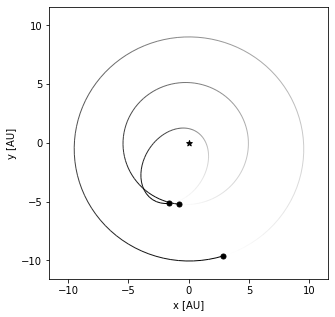

In [4]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, trails=True, unitlabel="[AU]")

### Horizons data

### Units

REBOUND has its own internal concept of units so it may be hard to integrate with astropy.units. It was originally created for Solar System studies, so by default it uses a system where $G=1$, length is in units of 1 AU, mass in units of $M_{sun}$ and time in the more exotic units of $yr/2\pi$.

If you want to use SI or cgs, give it a list of time, mass and length units (in any order, but _before_ adding bodies):

In [5]:
print(f'default G = {sim.G:.5f}')

sim2 = rebound.Simulation()
sim2.units = ('s', 'm', 'kg')
print(f'SI G = {sim2.G}')

sim2.units = ('cm', 'g', 's')
print(f'cgs G = {sim2.G}')

default G = 1.00000
SI G = 6.67408e-11
cgs G = 6.67408e-08


### Integrators

## Running a simulation

With a simulation created and particles added, we can move it forward by calling `sim.integrate(stop_time)`. Note that `stop_time` is an absolute time within the simulation, not an interval from the current value (`sim.t`). It had better be in the future or we have an infinite loop!

REBOUND will pick a timestep (`sim.dt`) if we don't set it manually. Good practice is to try a few different timesteps and compare the results; the default is certainly not guaranteed to be optimal.

The bodies were added with the Sun at the origin. To prevent the simulation from drifting over time it is generally useful to move to a center-of-mass frame with `sim.move_to_com()`.

In [24]:
print(f'start time: {sim.t}')
sim.t = 0.
sim.move_to_com()
sim.status()

start time: 500.0
---------------------------------
REBOUND version:     	3.8.2
REBOUND built on:    	May 18 2019 03:15:47
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.090874
---------------------------------
<rebound.Particle object, m=1.0 x=0.005570563030455403 y=0.005592989225853608 z=-0.00020920592284360767 vx=-0.00036544248447219213 vy=0.00032434471298376703 vz=6.676461309628066e-06>
<rebound.Particle object, m=0.0009547919152112404 x=-3.4545221165125626 y=-4.143300910306891 z=0.09458683433133382 vx=0.3312581978887918 vy=-0.26074272392354236 vz=-0.006298297706076929>
<rebound.Particle object, m=0.0002858856727222417 x=-7.947978718396295 y=-5.726061746352981 z=0.4158836537924036 vx=0.1719562747318603 vy=-0.26370565377950494 vz=-0.0023187506178960035>
<rebound.Particle object, m=0.0 x=-0.36629374814202836 y=1.5102480020748679 z=0.021755495312988274 vx=-1.0029225818741765 vy=0.0800747939216406 vz=-0.032898746

In [25]:
sim.integrate(10)
sim.status()

---------------------------------
REBOUND version:     	3.8.2
REBOUND built on:    	May 18 2019 03:15:47
Number of particles: 	4
Selected integrator: 	ias15
Simulation time:     	1.0000000000000000e+01
Current timestep:    	0.452746
---------------------------------
<rebound.Particle object, m=1.0 x=0.0011260007432010747 y=0.007250736312009059 z=-0.00011490884958285917 vx=-0.0004807893220580496 vy=-1.0111523599964073e-05 vz=1.129540120072618e-05>
<rebound.Particle object, m=0.0009547919152112404 x=0.5707725416498872 y=-5.192517147582539 z=0.009126699204722291 vx=0.4303410047437765 vy=0.06798386020131046 vz=-0.009896001461502829>
<rebound.Particle object, m=0.0002858856727222417 x=-5.844888047315421 y=-8.020559050992727 z=0.3714588071463142 vx=0.2445145616399097 vy=-0.19168122684601763 vz=-0.006459851572061593>
<rebound.Particle object, m=0.0 x=-4.337246156794088 y=-2.130661550524296 z=-0.20002744680673742 vx=-0.04857843278934349 vy=-0.3645780474588965 vz=-0.010099496671238958>
--------

## Getting the results



### Heartbeat logging

It is possible to define a hearbeat function that is called at each timestep. This can be used to print intermediate values or write them to disk.

Because of the way this function interfaces to the underying C code, it receives a pointer to the sim object and not the object itself. Use `sim.contents` to access data rather than `sim`.

In [26]:
def heartbeat(sim):
    print(sim.contents.t)
    
sim.heartbeat = heartbeat
sim.t = 0
sim.integrate(2)

0.0
0.4527460989319672
0.9653946736654517
1.5051512746924516
2.0


It's not clear how best to remove a heartbeat, but setting it to a do-nothing function is one option

In [32]:
def noheartbeat(sim):
    pass

sim.heartbeat = noheartbeat

### Getting particle data from the simulation

The simulation holds current particle data in an iterable `particles` object. A reasonably complete list of properties for each particle is shown below, though not all are valid in all circumstances.

- `x, y, z`     : Particle positions
- `vx, vy, vz`  : Particle velocities
- `ax, ay, az`  : Particle accelerations
- `m`           : Particle mass
- `r`           : Particle radius
- `lastcollision` : Last time the particle had a physical collision (if checking for collisions)
- `a, e, inc, Omega, omega, f`	: (Kepler Elements) Semi-major axis, eccentricity, inclination, longitude of the ascending node, argument of periapsis, and true anomaly respectively. The Keplerian Elements are in Jacobi coordinates (with `mu = G*Minc`, where `Minc` is the total mass from index 0 to the particle's index, inclusive).

In [23]:
print(len(sim.particles))
display(sim.particles[1])
sim.particles[1].a, sim.particles[1].e # don't try this on sim.particles[0], the Sun

4


<rebound.Particle object, m=0.0009547919152112404 x=-3.4545221165125626 y=-4.143300910306891 z=0.09458683433133382 vx=0.3312581978887918 vy=-0.26074272392354236 vz=-0.006298297706076929>

(5.204237482454723, 0.04764772197752536)

### Capturing a timecourse

Rather than heartbeat logging, a common strategy is to run the sim to a series of predefined endpoints, capturing the status in numpy arrays before restarting the integration.

In [33]:
import numpy as np
Noutputs = 100
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0., -70.*year, Noutputs)
x = np.zeros((2, Noutputs))
y = np.zeros((2, Noutputs))
sim.t = 0
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    x[1][i] = ps[3].x
    y[1][i] = ps[3].y

### Simulation archive

A relatively recent feature in REBOUND, the simulation archive makes it easy to take a full snapshot of the sim at regular intervals, saved in a disk file. These can be used for later analysis or (because they are bitwise identical to the sim object) as a starting point for further integration.

For examples see [SimulationArchive](../rebound/rebound_official_examples/SimulationArchive.ipynb) and [SimulationArchiveRestart](../rebound/rebound_official_examples/SimulationArchiveRestart.ipynb)

### Plotting

For maximum flexibility, capture the appropriate intermediate values during the integration then use Matplotlib to display them as you wish.

REBOUND has a convenience function called OrbitPlot() to show the current orbits in Matplotlib. This takes a variety of optional parameters: run `?rebound.OrbitPlot` for details. Basic usage was already illustrated in the 'getting started' section, a few more options are shown below.

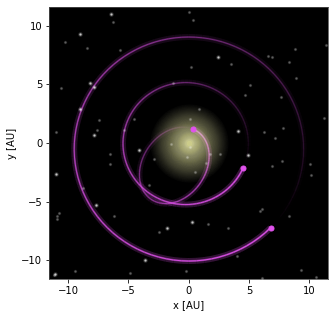

In [8]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, trails=True, unitlabel="[AU]", fancy=True)

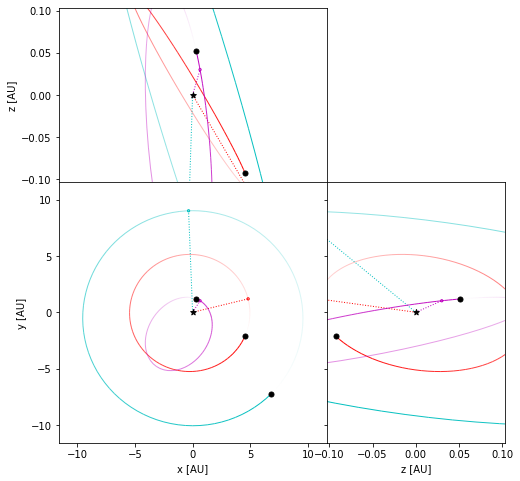

In [9]:
fig = rebound.OrbitPlot(sim, trails=True, unitlabel="[AU]", slices=True, periastron=True, color=True)

### Animations with WebGL

REBOUND can do real-time 3D visualizations in a widget. See [WebGLVisualization.ipynb](../rebouund/rebound_official_examples/WebGLVisualization.ipynb) for more on this.

This is a relatively new addition to REBOUND and still has some limitations and rough edges (honestly, any WebGL widget in Jupyter can be a bit unpredictable, not just these).

One problem is that there is no obvious way to control the update rate and things tend to go too fast to see properly. If your interest is in the animation more than the final results, it may be worth putting a pause in the heartbeat function.

In [10]:
from time import sleep

def slowheartbeat(sim):
    sleep(0.005)

sim.heartbeat = slowheartbeat
sim.getWidget(size=(500,500))

Widget(N=4, count=2, height=500.0, orbit_data=b'/W\xcd\xbb\x86\x8f\x85;R\x14\x089!\x81\xa6@[\x8aF=\x93\x9a-\xb…

In [11]:
sim.t = 0
sim.refreshWidgets()
sim.integrate(500)

Still not very smooth! 

The view can be tilted by dragging with the mouse and zooked with shift-drag. Not very intersiting in this example as the orbits are nearly coplanar.

## Collisions and close approaches

REBOUND can be set to automatically detect and respond when particles get "too" close (however you choose to define that). See [CloseEncounters.ipynb](../rebound/rebound_official_examples/CloseEncounters.ipynb) for details.

In short, there are two main ways to do this:
- Set `sim.exit_min_distance` to a non-zero value. Rebound checks all pairs after each timestep, and stops and throws an exception if appropriate.
- Set radii on each particle at the start (e.g. the Hill radius), plus the `sim.collision` and `sim.collision_resolve` callback functions to define how collisions are detected and responded to.